In [4]:
import pandas as pd
import quandl 

In [7]:
start_date = pd.to_datetime('2013-01-01')
end_date = pd.to_datetime('2018-01-01')

In [8]:
# Extract a bunch of tech stocks for our portfolio
aapl_stock = quandl.get('WIKI/AAPL.11',start_date=start_date,end_date=end_date)
cisco_stock = quandl.get('WIKI/CSCO.11',start_date=start_date,end_date=end_date)
ibm_stock = quandl.get('WIKI/IBM.11',start_date=start_date,end_date=end_date)
amzn_stock = quandl.get('WIKI/AMZN.11',start_date=start_date,end_date=end_date)

In [9]:
# You can also read from the csv file uploaded. Please do uncomment the execute it.
# aapl = pd.read_csv('AAPL_CLOSE',index_col='Date',parse_dates=True)
# cisco = pd.read_csv('CISCO_CLOSE',index_col='Date',parse_dates=True)
# ibm = pd.read_csv('IBM_CLOSE',index_col='Date',parse_dates=True)
# amzn = pd.read_csv('AMZN_CLOSE',index_col='Date',parse_dates=True)

In [11]:
aapl_stock.to_csv('AAPL_CLOSE')
cisco_stock.to_csv('CISCO_CLOSE')
ibm_stock.to_csv('IBM_CLOSE')
amzn_stock.to_csv('AMZN_CLOSE')

## Normalizing Stocks

This alll together same as cumulative daily returns

In [13]:
aapl_stock.head()

,Adj. Close
Date,
2013-01-02,71.195748
2013-01-03,70.296565
2013-01-04,68.338996
2013-01-07,67.937002
2013-01-08,68.119845


In [14]:
for df_stock in (aapl_stock,cisco_stock,ibm_stock,amzn_stock):
    df_stock['Normalize Return'] = df_stock['Adj. Close']/df_stock.iloc[0]['Adj. Close']

In [15]:
aapl_stock.head()

,Adj. Close,Normalize Return
Date,,
2013-01-02,71.195748,1.000000
2013-01-03,70.296565,0.987370
2013-01-04,68.338996,0.959875
2013-01-07,67.937002,0.954228
2013-01-08,68.119845,0.956797


In [16]:
aapl_stock.tail()

,Adj. Close,Normalize Return
Date,,
2017-12-22,175.01,2.458152
2017-12-26,170.57,2.395789
2017-12-27,170.60,2.396211
2017-12-28,171.08,2.402952
2017-12-29,169.23,2.376968


## Allocations

Let's consider we have the following allocations for our total portfolio:

* 30% in Apple
* 20% in Google/Alphabet
* 40% in Amazon
* 10% in IBM

Let's have these values be reflected by multiplying our Norme Return by out Allocations

In [21]:
for df_stock,allocation in zip([aapl_stock,cisco_stock,ibm_stock,amzn_stock],[.3,.2,.4,.1]):
    df_stock['Allocation'] = df_stock['Normalize Return']*allocation

In [22]:
aapl_stock.head()

,Adj. Close,Normalize Return,Allocation
Date,,,
2013-01-02,71.195748,1.000000,0.300000
2013-01-03,70.296565,0.987370,0.296211
2013-01-04,68.338996,0.959875,0.287962
2013-01-07,67.937002,0.954228,0.286269
2013-01-08,68.119845,0.956797,0.287039


## Investment 
Suppose we have invested one hundred thousand dollar 100000$ in all these portfolio

In [23]:
for df_stock in [aapl_stock,cisco_stock,ibm_stock,amzn_stock]:
    df_stock['Position Values'] = df_stock['Allocation']*100000

In [24]:
aapl_stock.head()

,Adj. Close,Normalize Return,Allocation,Position Values
Date,,,,
2013-01-02,71.195748,1.000000,0.300000,30000.000000
2013-01-03,70.296565,0.987370,0.296211,29621.108136
2013-01-04,68.338996,0.959875,0.287962,28796.240643
2013-01-07,67.937002,0.954228,0.286269,28626.850992
2013-01-08,68.119845,0.956797,0.287039,28703.895962


In [25]:
portfolio_val = pd.concat([aapl_stock['Position Values'],cisco_stock['Position Values'],ibm_stock['Position Values'],amzn_stock['Position Values']],axis=1)

In [26]:
portfolio_val

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2013-01-02,30000.000000,20000.000000,40000.000000,10000.000000
2013-01-03,29621.108136,20108.161259,39779.984721,10045.470444
2013-01-04,28796.240643,20139.528024,39519.225872,10071.509075
2013-01-07,28626.850992,19951.130777,39346.065699,10433.298356
2013-01-08,28703.895962,19970.501475,39291.061879,10352.493102
2013-01-09,28255.286596,19960.668633,39179.017061,10351.327193
2013-01-10,28605.540681,20098.328417,39293.099058,10312.074929
2013-01-11,28430.140429,20137.659784,39612.936084,10413.120361
2013-01-14,27416.534616,20619.469027,39240.132417,10599.277137


In [27]:
portfolio_val.columns = ['AAPL Pos','CISCO Pos','IBM Pos','AMZN Pos']

In [28]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos
Date,,,,
2013-01-02,30000.000000,20000.000000,40000.000000,10000.000000
2013-01-03,29621.108136,20108.161259,39779.984721,10045.470444
2013-01-04,28796.240643,20139.528024,39519.225872,10071.509075
2013-01-07,28626.850992,19951.130777,39346.065699,10433.298356
2013-01-08,28703.895962,19970.501475,39291.061879,10352.493102


In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

In [31]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2013-01-02,30000.000000,20000.000000,40000.000000,10000.000000,100000.000000
2013-01-03,29621.108136,20108.161259,39779.984721,10045.470444,99554.724560
2013-01-04,28796.240643,20139.528024,39519.225872,10071.509075,98526.503613
2013-01-07,28626.850992,19951.130777,39346.065699,10433.298356,98357.345824
2013-01-08,28703.895962,19970.501475,39291.061879,10352.493102,98317.952418


Text(0.5, 1.0, 'Total Portfolio Value')

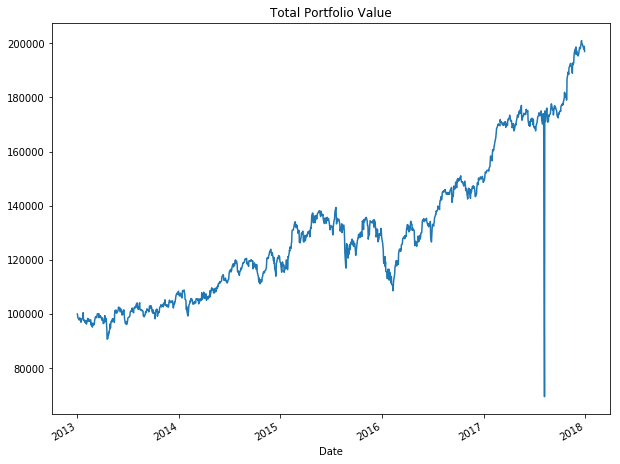

In [32]:
portfolio_val['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

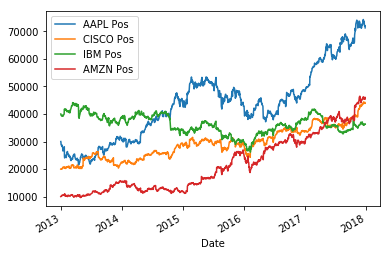

In [33]:
portfolio_val.drop('Total Pos',axis=1).plot(kind='line')